In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Graph
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from wrangle import new_city_data, missing_zero_values_table, clean_city

In [2]:
df = new_city_data()

In [3]:
df.shape

(11923, 17)

In [4]:
list(df.columns)

['FIRST NAME',
 'MIDDLE NAME',
 'LAST NAME',
 'HIRE DATE1',
 'FY16 ANNUAL SALARY2',
 'FY16 BASE PAY3',
 'FY16 LEAVE PAYOUT4',
 'FY16 OTHER5',
 'FY16 OVERTIME6',
 'FY16 GROSS EARNINGS7',
 'FY16 ADDITIONAL BENEFITS8',
 'FY16 TOTAL COMPENSATION9',
 'JOB TITLE',
 'BUSINESS AREA',
 'GENDER',
 'ETHNIC ORIGIN10',
 'EMPLOYEE SUBGROUP']

In [5]:
df = clean_city(df)

In [6]:
df.head()

,hire_date,annual_salary_2016,base_pay_2016,leave_payout_2016,other_2016,overtime_2016,gross_earnings_2016,additional_compensation,total_compensation,job_title,department,gender,ethnicity,years_employed,job_id,job_name
REF #,,,,,,,,,,,,,,,,
1,2005-11-07,425000.00,414615.38,0.00,97354.89,0.0,511970.27,75379.48000,587349.7500,1022-CITY MANAGER,CITY MANAGER'S OFFICE,FEMALE,WHITE,16,1022,CITY MANAGER
2,2011-06-13,200906.16,196106.64,12751.20,46221.88,0.0,255079.72,49355.34244,304435.0624,1013-CVB DIRECTOR,CONVENTION AND VISITORS BUREAU,FEMALE,WHITE,10,1013,CVB DIRECTOR
3,1997-04-02,230405.76,219271.20,8112.80,6840.00,0.0,234224.00,48466.71215,282690.7121,1021-DEPUTY CITY MANAGER,CITY MANAGER'S OFFICE,MALE,WHITE,24,1021,DEPUTY CITY MANAGER
4,1994-06-06,235014.26,223656.70,0.00,6840.00,0.0,230496.70,49268.05027,279764.7503,1021-DEPUTY CITY MANAGER,CITY MANAGER'S OFFICE,MALE,HISPANIC,27,1021,DEPUTY CITY MANAGER
5,2007-04-16,202562.62,197723.57,12397.05,9480.00,0.0,219600.62,46434.99509,266035.6151,1003-FIRE CHIEF,FIRE,MALE,BLACK,14,1003,FIRE CHIEF


<AxesSubplot:>

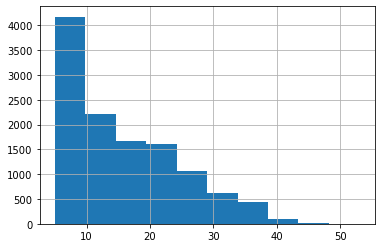

In [8]:
df.years_employed.hist()

In [10]:
df.groupby('ethnicity').years_employed.median()

ethnicity
AMERICAN INDIAN OR ALASKA NATIVE (NONHISPANIC/LAT)    20.0
ASIAN (NON HISPANIC OR LATINO)                        13.0
ASIAN OR PACIFIC ISLANDER                              9.5
BLACK                                                 10.0
BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LATINO)    12.0
HISPANIC                                              13.0
HISPANIC OR LATINO                                    15.0
NATIVE AMERICAN/ALASKAN                               14.0
NATIVE HAWAIIAN/OTHER PACIFIC ISLANDER (NON HIS)      14.0
OTHER                                                  6.0
TWO OR MORE RACES (NON HISPANIC OR LATINO)            14.0
WHITE                                                 14.0
WHITE (NON HISPANIC OR LATINO)                        16.0
Name: years_employed, dtype: float64

In [11]:
df.describe()

,annual_salary_2016,base_pay_2016,leave_payout_2016,other_2016,overtime_2016,gross_earnings_2016,additional_compensation,total_compensation,years_employed
count,11923.000000,11923.000000,11923.000000,11923.000000,11923.000000,11923.000000,11923.000000,11923.000000,11923.000000
mean,51665.146688,46521.141886,1592.511874,5246.367811,4124.500218,57484.521789,24065.967890,81550.489680,15.564539
std,22426.198015,26318.791088,2211.263406,7549.287121,8160.922331,36791.795606,16849.396949,52549.340694,9.147256
min,18200.000000,0.000000,0.000000,-100.000000,-239.450000,0.000000,0.000000,0.000000,5.000000
25%,32607.380000,30025.240000,0.000000,53.080000,0.000000,32118.335000,14187.673405,46409.635645,7.000000
50%,49188.100000,46419.880000,660.300000,825.420000,356.390000,51073.580000,17811.979020,68812.363670,14.000000
75%,65155.490000,64428.000000,2220.640000,9805.380000,4713.355000,85713.080000,44431.451890,128011.598200,22.000000
max,425000.000000,414615.380000,16947.960000,97354.890000,68212.290000,511970.270000,75379.480000,587349.750000,53.000000
